In [250]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st

!pip install matplotlib

In [251]:
ls

Auto Financing VS the Impact of COVID on the Automotive industry .ipynb
FRB_G19.csv
Impact_Vehicule_COVID-19/
python-api-challenge/


In [252]:
# Import csv via panda
FRB_COVID_data = pd.read_csv("FRB_G19.csv")
FRB_COVID_data.head(960)

,Series Description,"Percent change of total consumer credit, seasonally adjusted at an annual rate","Percent change of total revolving consumer credit, seasonally adjusted at an annual rate","Percent change of total nonrevolving consumer credit, seasonally adjusted at an annual rate","Total consumer credit owned and securitized, seasonally adjusted level","Revolving consumer credit owned and securitized, seasonally adjusted level","Nonrevolving consumer credit owned and securitized, seasonally adjusted level","Total consumer credit owned and securitized, not seasonally adjusted level","Total securitized consumer credit, not seasonally adjusted level","Total consumer credit owned and securitized by depository institutions, not seasonally adjusted level",...,"Finance rate on personal loans at commercial banks, 24 month loan; not seasonally adjusted","Commercial bank interest rate on credit card plans, all accounts; not seasonally adjusted","Commercial bank interest rate on credit card plans, accounts assessed interest; not seasonally adjusted","New car average finance rate at auto finance companies, not seasonally adjusted (discontinued after January 2011)","Weighted-average maturity of new car loans at auto finance companies, not seasonally adjusted (discontinued after January 2011)","Loan-to-value ratio of new car loans at auto finance companies, not seasonally adjusted (discontinued after January 2011)","Average amount financed for new car loans at auto finance companies, not seasonally adjusted (discontinued after January 2011)","Average maturity of new car loans at finance companies, amount of finance weighted, not seasonally adjusted","Average finance rate of new car loans at finance companies, amount of finance weighted, not seasonally adjusted","Average amount financed for new car loans at finance companies, not seasonally adjusted"
0,Unit:,Percent,Percent,Percent,Currency,Currency,Currency,Currency,Currency,Currency,...,Percent,Percent,Percent,Percent,Months,Percent,Currency,Months,Percent,Currency
1,Multiplier:,1,1,1,1000000,1000000,1000000,1000000,1000000,1000000,...,1,1,1,1,1,1,1,1,1,1
2,Currency:,USD,USD,USD,USD,USD,USD,USD,USD,USD,...,USD,USD,USD,USD,USD,USD,USD,USD,USD,USD
3,Unique Identifier:,G19/CCOUT/DTCTL_@%A_BA.M,G19/CCOUT/DTCTLR_@%A_BA.M,G19/CCOUT/DTCTLN_@%A_BA.M,G19/CCOUT/DTCTL.M,G19/CCOUT/DTCTLR.M,G19/CCOUT/DTCTLN.M,G19/CCOUT/DTCTL_N.M,G19/CCOUT/DTCNL_N.M,G19/CCOUT/DTCTLHD_N.M,...,G19/TERMS/RIFLPBCIPLM24_N.M,G19/TERMS/RIFSPBCICC_N.M,G19/TERMS/RIFSPBCICCI_N.M,G19/TERMS/H0.RIFLPCFAN_N.M,G19/TERMS/H0.DTCTLVNM_N.M,G19/TERMS/H0.DTCTLVNL_N.M,G19/TERMS/H0.DTCTLVNA_N.M,G19/TERMS/DTCTLVENM_N.M,G19/TERMS/RIELPCFAN_N.M,G19/TERMS/DTCTLVENA_N.M
4,Time Period,DTCTL_@%A_BA.M,DTCTLR_@%A_BA.M,DTCTLN_@%A_BA.M,DTCTL.M,DTCTLR.M,DTCTLN.M,DTCTL_N.M,DTCNL_N.M,DTCTLHD_N.M,...,RIFLPBCIPLM24_N.M,RIFSPBCICC_N.M,RIFSPBCICCI_N.M,H0.RIFLPCFAN_N.M,H0.DTCTLVNM_N.M,H0.DTCTLVNL_N.M,H0.DTCTLVNA_N.M,DTCTLVENM_N.M,RIELPCFAN_N.M,DTCTLVENA_N.M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
955,2022-03,10.11,25.75,5.35,4637069.03,1096869.11,3540199.92,4577611.19,1256.39,1830909.36,...,ND,ND,ND,NaN,NaN,NaN,NaN,66.29,4.41,37991.37
956,2022-04,7.38,15.09,4.99,4665575.21,1110666.40,3554908.81,4608598.69,1316.26,1856081.89,...,ND,ND,ND,NaN,NaN,NaN,NaN,ND,ND,ND
957,2022-05,6.92,10.39,5.84,4692486.22,1120278.49,3572207.73,4650274.56,1381.54,1880933.05,...,8.73,15.13,16.65,NaN,NaN,NaN,NaN,ND,ND,ND
958,2022-06,8.59,15.46,6.43,4726073.38,1134712.89,3591360.49,4695209.26,1447.08,1915051.04,...,ND,ND,ND,NaN,NaN,NaN,NaN,66.45,4.98,38044.46


In [253]:
type(FRB_COVID_data)

pandas.core.frame.DataFrame

# New Car Auto Loan Rates throughout COVID

In [254]:
#create dataframe displaying avg New Car Auto Loan rates for COVID date range 
df2=FRB_COVID_data[["Series Description","Average finance rate of new car loans at finance companies, amount of finance weighted, not seasonally adjusted"]].iloc[928:967]
df2


,Series Description,"Average finance rate of new car loans at finance companies, amount of finance weighted, not seasonally adjusted"
928,2019-12,6.11
929,2020-01,ND
930,2020-02,ND
931,2020-03,6.13
932,2020-04,ND
933,2020-05,ND
934,2020-06,4.80
935,2020-07,ND
936,2020-08,ND
937,2020-09,4.98


In [255]:
# remove months that report ND (no data) to show COVID quarters
clean_df = df2.drop(labels = [929,930,932,933,935,936,938,939,941,942,944,945,947,948,950,951,953,954,956,957,959,960,962,963,965,966], axis = 0, inplace = False)

In [256]:
#rename columns 
df3= clean_df.rename(columns={"Series Description":"COVID Quarters","Average finance rate of new car loans at finance companies, amount of finance weighted, not seasonally adjusted":"Average New Car Auto Loan Rates"})
df3

,COVID Quarters,Average New Car Auto Loan Rates
928,2019-12,6.11
931,2020-03,6.13
934,2020-06,4.80
937,2020-09,4.98
940,2020-12,5.07
943,2021-03,4.79
946,2021-06,4.86
949,2021-09,4.54
952,2021-12,4.37
955,2022-03,4.41


In [257]:
df3.dtypes

COVID Quarters                     object
Average New Car Auto Loan Rates    object
dtype: object

In [258]:
#convert date format from string to date
df3["COVID Quarters"]=pd.to_datetime(df3["COVID Quarters"]).dt.date
df3.dtypes

COVID Quarters                     object
Average New Car Auto Loan Rates    object
dtype: object

In [259]:
#convert rates from string format to float
df3["Average New Car Auto Loan Rates"]=df3["Average New Car Auto Loan Rates"].astype(float)
df3

,COVID Quarters,Average New Car Auto Loan Rates
928,2019-12-01,6.11
931,2020-03-01,6.13
934,2020-06-01,4.80
937,2020-09-01,4.98
940,2020-12-01,5.07
943,2021-03-01,4.79
946,2021-06-01,4.86
949,2021-09-01,4.54
952,2021-12-01,4.37
955,2022-03-01,4.41


<function matplotlib.pyplot.show(close=None, block=None)>

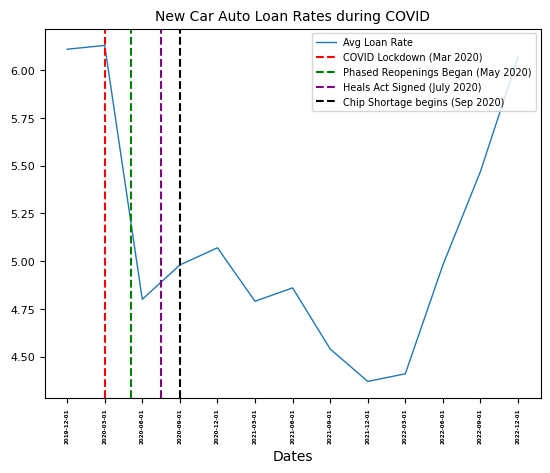

In [268]:
#Plot data
b = df3.reset_index()
plt.plot(b["Average New Car Auto Loan Rates"],label = "Avg Loan Rate", linewidth = 1)
plt.xticks(range(0,len(b["Average New Car Auto Loan Rates"])),(b["COVID Quarters"]), rotation = 90, fontsize = 4, fontweight = "bold")
plt.yticks(fontsize = 8)
plt.title("New Car Auto Loan Rates during COVID", fontsize = 10)
plt.xlabel("Dates")
plt.axvline(x = 1, color = "red", linestyle = "--",label = "COVID Lockdown (Mar 2020)")
plt.axvline(x = 1.7, color = "green", linestyle = "--",label = "Phased Reopenings Began (May 2020)")
plt.axvline(x = 2.5, color = "purple", linestyle = "--",label = "Heals Act Signed (July 2020)")
plt.axvline(x = 3, color = "black", linestyle = "--",label = "Chip Shortage begins (Sep 2020)")
plt.legend(loc = "upper right", fontsize= 7)

plt.savefig("Covid Rates.png")

plt.show

# New Car Auto Loan Amounts throughout COVID 

In [261]:
# Create loan amt DF
FRB_COVID_data.head(960)

,Series Description,"Percent change of total consumer credit, seasonally adjusted at an annual rate","Percent change of total revolving consumer credit, seasonally adjusted at an annual rate","Percent change of total nonrevolving consumer credit, seasonally adjusted at an annual rate","Total consumer credit owned and securitized, seasonally adjusted level","Revolving consumer credit owned and securitized, seasonally adjusted level","Nonrevolving consumer credit owned and securitized, seasonally adjusted level","Total consumer credit owned and securitized, not seasonally adjusted level","Total securitized consumer credit, not seasonally adjusted level","Total consumer credit owned and securitized by depository institutions, not seasonally adjusted level",...,"Finance rate on personal loans at commercial banks, 24 month loan; not seasonally adjusted","Commercial bank interest rate on credit card plans, all accounts; not seasonally adjusted","Commercial bank interest rate on credit card plans, accounts assessed interest; not seasonally adjusted","New car average finance rate at auto finance companies, not seasonally adjusted (discontinued after January 2011)","Weighted-average maturity of new car loans at auto finance companies, not seasonally adjusted (discontinued after January 2011)","Loan-to-value ratio of new car loans at auto finance companies, not seasonally adjusted (discontinued after January 2011)","Average amount financed for new car loans at auto finance companies, not seasonally adjusted (discontinued after January 2011)","Average maturity of new car loans at finance companies, amount of finance weighted, not seasonally adjusted","Average finance rate of new car loans at finance companies, amount of finance weighted, not seasonally adjusted","Average amount financed for new car loans at finance companies, not seasonally adjusted"
0,Unit:,Percent,Percent,Percent,Currency,Currency,Currency,Currency,Currency,Currency,...,Percent,Percent,Percent,Percent,Months,Percent,Currency,Months,Percent,Currency
1,Multiplier:,1,1,1,1000000,1000000,1000000,1000000,1000000,1000000,...,1,1,1,1,1,1,1,1,1,1
2,Currency:,USD,USD,USD,USD,USD,USD,USD,USD,USD,...,USD,USD,USD,USD,USD,USD,USD,USD,USD,USD
3,Unique Identifier:,G19/CCOUT/DTCTL_@%A_BA.M,G19/CCOUT/DTCTLR_@%A_BA.M,G19/CCOUT/DTCTLN_@%A_BA.M,G19/CCOUT/DTCTL.M,G19/CCOUT/DTCTLR.M,G19/CCOUT/DTCTLN.M,G19/CCOUT/DTCTL_N.M,G19/CCOUT/DTCNL_N.M,G19/CCOUT/DTCTLHD_N.M,...,G19/TERMS/RIFLPBCIPLM24_N.M,G19/TERMS/RIFSPBCICC_N.M,G19/TERMS/RIFSPBCICCI_N.M,G19/TERMS/H0.RIFLPCFAN_N.M,G19/TERMS/H0.DTCTLVNM_N.M,G19/TERMS/H0.DTCTLVNL_N.M,G19/TERMS/H0.DTCTLVNA_N.M,G19/TERMS/DTCTLVENM_N.M,G19/TERMS/RIELPCFAN_N.M,G19/TERMS/DTCTLVENA_N.M
4,Time Period,DTCTL_@%A_BA.M,DTCTLR_@%A_BA.M,DTCTLN_@%A_BA.M,DTCTL.M,DTCTLR.M,DTCTLN.M,DTCTL_N.M,DTCNL_N.M,DTCTLHD_N.M,...,RIFLPBCIPLM24_N.M,RIFSPBCICC_N.M,RIFSPBCICCI_N.M,H0.RIFLPCFAN_N.M,H0.DTCTLVNM_N.M,H0.DTCTLVNL_N.M,H0.DTCTLVNA_N.M,DTCTLVENM_N.M,RIELPCFAN_N.M,DTCTLVENA_N.M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
955,2022-03,10.11,25.75,5.35,4637069.03,1096869.11,3540199.92,4577611.19,1256.39,1830909.36,...,ND,ND,ND,NaN,NaN,NaN,NaN,66.29,4.41,37991.37
956,2022-04,7.38,15.09,4.99,4665575.21,1110666.40,3554908.81,4608598.69,1316.26,1856081.89,...,ND,ND,ND,NaN,NaN,NaN,NaN,ND,ND,ND
957,2022-05,6.92,10.39,5.84,4692486.22,1120278.49,3572207.73,4650274.56,1381.54,1880933.05,...,8.73,15.13,16.65,NaN,NaN,NaN,NaN,ND,ND,ND
958,2022-06,8.59,15.46,6.43,4726073.38,1134712.89,3591360.49,4695209.26,1447.08,1915051.04,...,ND,ND,ND,NaN,NaN,NaN,NaN,66.45,4.98,38044.46


In [262]:
#create dataframe displaying avg New Car Auto Loan amount for COVID date range
df4=FRB_COVID_data[["Series Description","Average amount financed for new car loans at finance companies, not seasonally adjusted"]].iloc[928:967]
df4

,Series Description,"Average amount financed for new car loans at finance companies, not seasonally adjusted"
928,2019-12,31692.14
929,2020-01,ND
930,2020-02,ND
931,2020-03,32723.94
932,2020-04,ND
933,2020-05,ND
934,2020-06,36674.90
935,2020-07,ND
936,2020-08,ND
937,2020-09,34660.26


In [263]:
# remove months that report ND (no data) to show COVID quarters
clean_df2 = df4.drop(labels = [929,930,932,933,935,936,938,939,941,942,944,945,947,948,950,951,953,954,956,957,959,960,962,963,965,966], axis = 0, inplace = False)
clean_df2

,Series Description,"Average amount financed for new car loans at finance companies, not seasonally adjusted"
928,2019-12,31692.14
931,2020-03,32723.94
934,2020-06,36674.90
937,2020-09,34660.26
940,2020-12,33738.23
943,2021-03,34207.35
946,2021-06,33914.94
949,2021-09,35283.89
952,2021-12,37820.76
955,2022-03,37991.37


In [264]:
#rename columns 
df5= clean_df2.rename(columns={"Series Description":"COVID Quarters","Average amount financed for new car loans at finance companies, not seasonally adjusted":"Average New Car Auto Loan Amount"})
df5

,COVID Quarters,Average New Car Auto Loan Amount
928,2019-12,31692.14
931,2020-03,32723.94
934,2020-06,36674.90
937,2020-09,34660.26
940,2020-12,33738.23
943,2021-03,34207.35
946,2021-06,33914.94
949,2021-09,35283.89
952,2021-12,37820.76
955,2022-03,37991.37


In [265]:
#convert date format from string to date
df5["COVID Quarters"]=pd.to_datetime(df5["COVID Quarters"]).dt.date

In [266]:
#convert loan amounts from string format to float
df5["Average New Car Auto Loan Amount"]=df5["Average New Car Auto Loan Amount"].astype(float)

<function matplotlib.pyplot.show(close=None, block=None)>

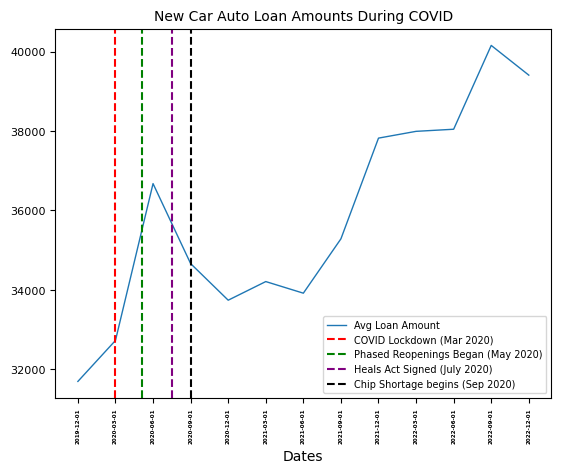

In [269]:
#plot data
a = df5.reset_index()
plt.plot(a["Average New Car Auto Loan Amount"],label = "Avg Loan Amount", linewidth = 1)
plt.xticks(range(0,len(a["Average New Car Auto Loan Amount"])),(a["COVID Quarters"]), rotation = 90, fontsize = 4, fontweight = "bold")
plt.yticks(fontsize = 8)
plt.title("New Car Auto Loan Amounts During COVID", fontsize = 10)
plt.xlabel("Dates")
#add vertical lines showing key events
plt.axvline(x = 1, color = "red", linestyle = "--",label = "COVID Lockdown (Mar 2020)")
plt.axvline(x = 1.7, color = "green", linestyle = "--",label = "Phased Reopenings Began (May 2020)")
plt.axvline(x = 2.5, color = "purple", linestyle = "--",label = "Heals Act Signed (July 2020)")
plt.axvline(x = 3, color = "black", linestyle = "--",label = "Chip Shortage begins (Sep 2020)")
plt.legend(loc = "lower right", fontsize= 7)

plt.savefig("Covid Loan Amt.png")
plt.show